In [70]:
# import necessary libraries and set up the grid
import matplotlib.pyplot as plt
import numpy as np
import random as rd


# the number of cells in the x and y directions and the number of time steps
nx = 100
ny = 100
nt = 100#175

neighbour_range = 1  # the range of the neighbourhood
round_inf = (neighbour_range * 2 + 1) ** 2

# the initial state of the cells
male_init_number = 400
female_init_number = 400
prey_init_number = 1500
parasite_init_number = 1000

male_array = []
female_array = []
prey_array = []
parasite_array = []
lamprey_array = []

picture_style = "gray"

In [71]:
# the SET of rules for the simulation
def inRange(l, r, key):
    if l <= key and key <= r:
        return True
    else:
        return False


# 存在概率修正
def nextCellLampary(countResult, state, flag):
    alive_lampary = countResult[0] + countResult[1]
    food_need_lampary = countResult[0] * 0.6 + countResult[1] * 1.4
    food_get_lampary = countResult[0] * 1.4 + countResult[1] * 0.6
    bitrh_ability_lampary = countResult[0] * 0.5 + countResult[1] * 1.5
    as_food_lampary = countResult[0] * 0.5 + countResult[1] * 1.5

    if flag == "lampary":
        if state == 0:
            if (
                inRange(-round_inf, 4, alive_lampary)
                and inRange(1.2, round_inf, bitrh_ability_lampary)
                and inRange(food_need_lampary, round_inf, countResult[2])
                and inRange(-round_inf, 6, countResult[3])
            ):
                female_probability = 0.35 + 0.11 * (countResult[2] - food_need_lampary)
                if rd.random() > female_probability:
                    return 1
                else:
                    return 2
            else:
                return 0

        elif state == 1:
            if (
                inRange(1, 5, alive_lampary)
                and inRange(food_need_lampary - 1, round_inf, countResult[2])
                and inRange(-round_inf, 5, countResult[3])
            ):
                female_probability = 0.05 * (countResult[2] - food_need_lampary)
                if rd.random() > female_probability:
                    return 1
                else:
                    return 2
            else:
                return 0

        elif state == 2:
            if (
                inRange(1, 5, alive_lampary)
                and inRange(food_need_lampary - 1, round_inf, countResult[2])
                and inRange(-round_inf, 5, countResult[3])
            ):
                female_probability = 0.65 + 0.1 * (countResult[2] - food_need_lampary)
                if rd.random() > female_probability:
                    return 1
                else:
                    return 2
            else:
                return 0

        else:
            print("state is wrong")
            exit(1)

    elif flag == "lampary_half_birth":
        if state == 0:
            if (
                inRange(-round_inf, 4, alive_lampary)
                and inRange(1.2, round_inf, bitrh_ability_lampary)
                and inRange(food_need_lampary, round_inf, countResult[2])
                and inRange(-round_inf, 6, countResult[3])
            ):
                return 3 - rd.choice([1, 2])
            else:
                return 0
        elif state != 0:
            if (
                inRange(1, 5, alive_lampary)
                and inRange(food_need_lampary - 1, round_inf, countResult[2])
                and inRange(-round_inf, 5, countResult[3])
            ):
                return state
            else:
                return 0
        else:
            print("state is wrong")
            exit(1)

    elif flag == "lampary_half_alive":
        if state == 0:
            if (
                inRange(-round_inf, 4, alive_lampary)
                and inRange(1.2, round_inf, alive_lampary)
                and inRange(alive_lampary, round_inf, countResult[2])
                and inRange(-round_inf, 6, countResult[3])
            ):
                return rd.choice([1, 2])
            else:
                return 0
        elif state == 1:
            if (
                inRange(1, 5, alive_lampary)
                and inRange(food_need_lampary - 1, round_inf, countResult[2])
                and inRange(-round_inf, 5, countResult[3])
            ):
                female_probability = 0.1 * (countResult[2] - food_need_lampary)
                if rd.random() > female_probability:
                    return 1
                else:
                    return 2
            else:
                return 0

        elif state == 2:
            if (
                inRange(1, 5, alive_lampary)
                and inRange(food_need_lampary - 1, round_inf, countResult[2])
                and inRange(-round_inf, 5, countResult[3])
            ):
                return 2
            else:
                return 0
        else:
            print("state is wrong")
            exit(1)

    elif flag == "prey":
        if state == 0:
            if inRange(-round_inf, 1.5, food_get_lampary) and inRange(
                2, 4, countResult[2]
            ):
                return 1
            else:
                return 0
        elif state == 1:
            if inRange(-round_inf, 2.5, food_get_lampary) and inRange(
                3, 5, countResult[2]
            ):
                return 1
            else:
                return 0
        else:
            print("state is wrong")
            exit(1)

    elif flag == "parasite":
        if state == 0:
            if countResult[3] == 0:
                return 0
            if (as_food_lampary / countResult[3] > 0.45) and inRange(1, 9, countResult[3]):
                return 1
            else:
                return 0
        elif state == 1:
            if (as_food_lampary / countResult[3] > 0.4) and inRange(
                1, 9, countResult[3]
            ):
                return 1
            else:
                return 0
        else:
            print("state is wrong")
            exit(1)

    else:
        print("flag is wrong")
        exit(1)

In [72]:
class cellState:
    # initialize the state of the cells
    def __init__(self, nx, ny):
        self.nx = nx
        self.ny = ny

        self.lampreys = np.zeros(
            (nx, ny)
        )  # 0 = dead, 1 = alive male, 2 = alive female,
        self.prey = np.zeros((nx, ny))  # 0 = dead, 1 = alive
        self.parasite = np.zeros((nx, ny))  # 0 = dead, 1 = alive

        self.lampreys_male_alive = 0
        self.lampreys_female_alive = 0
        self.prey_alive = 0
        self.parasite_alive = 0

    # set the initial state of the cells
    def random_lampreys(self, total_number_1, total_number_2):
        # 随机生成 total_number_1 个 1
        for _ in range(total_number_1):
            while True:
                i, j = rd.randint(0, self.nx - 1), rd.randint(0, self.ny - 1)
                if self.lampreys[i][j] == 0:
                    self.lampreys[i][j] = 1
                    self.lampreys_male_alive += 1
                    break
        # 随机生成 total_number_2 个 2
        for _ in range(total_number_2):
            while True:
                i, j = rd.randint(0, self.nx - 1), rd.randint(0, self.ny - 1)
                if self.lampreys[i][j] == 0:
                    self.lampreys[i][j] = 2
                    self.lampreys_female_alive += 1
                    break

    # set the initial state of the cells
    def random_prey(self, total_number):
        # 随机生成 total_number 个 1
        count = 0
        while count < total_number:
            i, j = rd.randint(0, self.nx - 1), rd.randint(0, self.ny - 1)
            if self.prey[i][j] == 0:
                self.prey[i][j] = 1
                self.prey_alive += 1
                count += 1

    # set the initial state of the cells
    def random_parasite(self, total_number):
        # 随机生成 total_number 个 1
        count = 0
        while count < total_number:
            i, j = rd.randint(0, self.nx - 1), rd.randint(0, self.ny - 1)
            if self.parasite[i][j] == 0:
                self.parasite[i][j] = 1
                self.parasite_alive += 1
                count += 1

    # plot the state of the cells
    def plot_state(self, style, step):
        plt.subplot(1, 3, 1, title="Lampreys")
        plt.imshow(self.lampreys, cmap=style, interpolation='nearest', vmin=0, vmax=2)
        plt.subplot(1, 3, 2, title="Prey")
        plt.imshow(self.prey, cmap=style,  interpolation='nearest', vmin=0, vmax=1)
        plt.subplot(1, 3, 3, title="parasite")
        plt.imshow(self.parasite, cmap=style,  interpolation='nearest',vmin=0, vmax=1)
        plt.show()

        print("step: ", step)
        print("Lampreys  male  alive: ", self.lampreys_male_alive)
        print("Lampreys female alive: ", self.lampreys_female_alive)
        print("Prey            alive: ", self.prey_alive)
        print("parasite        alive: ", self.parasite_alive)
        print("-----------------------------------")
        print("\n")

    # judge the state of the cells
    def countCellState(self, i, j):
        alive_male_neighbors = 0
        alive_female_neighbors = 0
        prey_neighbors = 0
        parasite_neighbors = 0

        # for the edge, we assume that the top is connected to the bottom, and the left is connected to the right
        for x in range(-neighbour_range, neighbour_range + 1):
            for y in range(-neighbour_range, neighbour_range + 1):
                if self.lampreys[(i + x) % nx, (j + y) % ny] == 1:
                    alive_male_neighbors += 1
                if self.lampreys[(i + x) % nx, (j + y) % ny] == 2:
                    alive_female_neighbors += 1
                if self.prey[(i + x) % nx, (j + y) % ny] == 1:
                    prey_neighbors += 1
                if self.parasite[(i + x) % nx, (j + y) % ny] == 1:
                    parasite_neighbors += 1

        result = (
            alive_male_neighbors,
            alive_female_neighbors,
            prey_neighbors,
            parasite_neighbors,
        )
        return result

    # update the state of the cells
    def updateState(self):
        new_lampreys = np.zeros((self.nx, self.ny))
        new_prey = np.zeros((self.nx, self.ny))
        new_parasite = np.zeros((self.nx, self.ny))
        new_male_alive = 0
        new_female_alive = 0
        new_prey_alive = 0
        new_parasite_alive = 0

        # for the lampreys
        for i in range(self.nx):
            for j in range(self.ny):
                new_lampreys[i][j] = nextCellLampary(
                    self.countCellState(i, j), self.lampreys[i][j], "lampary_half_birth"
                )
                if new_lampreys[i][j] == 1:
                    new_male_alive += 1
                elif new_lampreys[i][j] == 2:
                    new_female_alive += 1

        self.lampreys = new_lampreys.copy()
        self.lampreys_male_alive = new_male_alive
        self.lampreys_female_alive = new_female_alive

        # for the prey and the parasite
        for i in range(self.nx):
            for j in range(self.ny):
                # for the prey
                new_prey[i][j] = nextCellLampary(
                    self.countCellState(i, j), self.prey[i][j], "prey"
                )
                if new_prey[i][j] == 1:
                    new_prey_alive += 1
                new_parasite[i][j] = nextCellLampary(
                    self.countCellState(i, j), self.parasite[i][j], "parasite"
                )
                if new_parasite[i][j] == 1:
                    new_parasite_alive += 1

        self.prey = new_prey.copy()
        self.prey_alive = new_prey_alive
        self.parasite = new_parasite.copy()
        self.parasite_alive = new_parasite_alive

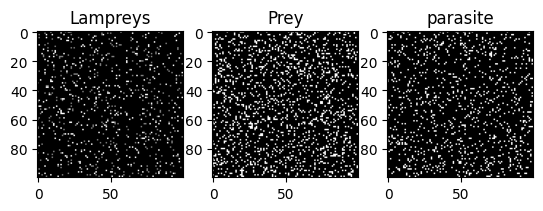

step:  -1
Lampreys  male  alive:  400
Lampreys female alive:  400
Prey            alive:  1500
parasite        alive:  1000
-----------------------------------


The end of the simulation
[1500, 1793, 2128, 2417, 2687, 2988, 3033, 3488, 3330, 3442, 3484, 3443, 3407, 3352, 3368, 3339, 3265, 3532, 3466, 3558, 3461, 3517, 3615, 3546, 3742, 3556, 3607, 3464, 3270, 3478, 3560, 3622, 3361, 3554, 3351, 3291, 3582, 3498, 3760, 3621, 3635, 3675, 3390, 3671, 3768, 3307, 3576, 3309, 3512, 3552, 3342, 3171, 3375, 3422, 3365, 3528, 3420, 3536, 3463, 3498, 3427, 3533, 3463, 3586, 3408, 3461, 3608, 3656, 3601, 3420, 3581, 3485, 3464, 3336, 3515, 3343, 3483, 3471, 3549, 3492, 3405, 3490, 3600, 3517, 3568, 3487, 3710, 3624, 3632, 3533, 3409, 3487, 3481, 3457, 3517, 3869, 3746, 3658, 3922, 3614, 3469]
[400, 777, 460, 620, 505, 596, 514, 510, 538, 565, 539, 598, 562, 579, 629, 554, 604, 515, 593, 520, 556, 544, 529, 578, 530, 542, 597, 599, 642, 544, 572, 557, 527, 566, 604, 578, 498, 566, 512, 505, 548,

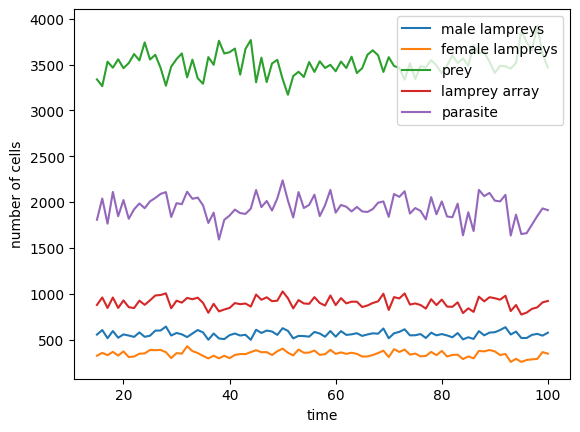

In [73]:
# main function
if __name__ == "__main__":
    state = cellState(nx, ny)
    state.random_lampreys(male_init_number, female_init_number)
    state.random_prey(prey_init_number)
    state.random_parasite(parasite_init_number)
    state.plot_state(picture_style, -1)

    male_array.append(state.lampreys_male_alive)
    female_array.append(state.lampreys_female_alive)
    prey_array.append(state.prey_alive)
    parasite_array.append(state.parasite_alive)


    for i in range(0, nt):
        state.updateState()

        # 此刻发生一场灾难，prey数量减少一半
        if i == 1065: 
            disaster = state.prey_alive // 3 * 2
            exsit_set = []
            for x in range(0, nx):
                for y in range(0, ny):
                    if state.prey[x][y] == 1:
                        exsit_set.append((x, y))
            while disaster > 0:
                (x,y) = rd.choice(exsit_set)
                exsit_set.remove((x,y))
                state.prey[x][y] = 0
                disaster -= 1
                state.prey_alive -= 1
            print("A disaster happened ! ! !")

        # 此刻发生一场灾难，prey数量增多一半
        if i == 1010:
            disaster = state.prey_alive //  3 * 2
            exsit_set = []
            for x in range(0, nx):
                for y in range(0, ny):
                    if state.prey[x][y] == 0:
                        exsit_set.append((x, y))
            while disaster > 0:
                (x,y) = rd.choice(exsit_set)
                exsit_set.remove((x,y))
                state.prey[x][y] = 1
                disaster -= 1
                state.prey_alive += 1
            print("A disaster happened ! ! !")

        # append the number of cells to the array
        male_array.append(state.lampreys_male_alive)
        female_array.append(state.lampreys_female_alive)
        prey_array.append(state.prey_alive)
        parasite_array.append(state.parasite_alive)

        # plot the state of the cells
        if i % 20 == 120:
            state.plot_state(picture_style, i)

        # check if the number of cells is conserved
        if (
            state.lampreys_female_alive
            + state.lampreys_male_alive
            + state.prey_alive
            + state.parasite_alive
            > 3 * nx * ny
        ):
            print("Error: the number of cells is not conserved")
            break


    print("The end of the simulation")
    for i in range(0, nt + 1):
        lamprey_array.append(male_array[i] + female_array[i]) 
    print(prey_array)
    print(male_array)
    print(female_array)
    print(lamprey_array)
    print(parasite_array)   

    # plot the trend of the number of cells
    plt.plot(range(15, nt + 1), male_array[15:], label="male lampreys")
    plt.plot(range(15, nt + 1), female_array[15:], label="female lampreys")
    plt.plot(range(15, nt + 1), prey_array[15:], label="prey")
    plt.plot(range(15, nt + 1), lamprey_array[15:], label="lamprey array")
    plt.plot(range(15, nt + 1), parasite_array[15:], label="parasite")
    plt.xlabel("time")
    plt.ylabel("number of cells")
    plt.legend()
    plt.show()

    